# TPIR Showcase Showdown Analysis

In [22]:
import os, sys

sys.path.append(os.pardir)

In [23]:
from src.functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


I want in this notebook to calculate the odds for various scenarios involving the "Showcase Showdown" on the game show *The Price Is Right*.

## Showcase Showdown Structure

The game works like this:

Each of three players spins a wheel with the goal of getting as close as possible to \\$1.00 without going over. A player who goes over \\$1.00 is out. If the first two players both go over \\$1.00, the third player wins automatically but still gets one spin to try to spin \\$1.00 (see below).

In the event of a tie, each of the tied players gets one spin to determine a winner.

The wheel has twenty spaces for each nickel increment between \\$0.05 and \\$1.00 (inclusive), and each player may spin once or twice, the value of the second spin being added to that of the first.

If after only one spin the current player has an amount below the current leader's amount, the current player must spin again.

There is also a bonus for reaching \\$1.00 exactly, so sometimes the third player will, even after getting an amount above the leader, spin again in an attempt to get \\$1.00.

## Defining Our Problem

With this setup there are questions of strategy. Suppose you are spinning first and you spin \\$0.60. You have a 60\% chance of going over, but that of course does not prove that you shouldn't proceed. The answer to this question depends equally on what your chances of winning are *if you stay on \\$0.60*. And this will require some calculation.

In fact, Player 1's optimal strategy will depend on Player 2's strategy, so let's start by trying to find the optimal strategy for Player 2. On which values should Player 2 stand, and on which values should Player 2 spin again?

Assuming that Player 1 is irrelevant (because of going over \\$1.00 or because of Player 2 surpassing Player 1's score on one spin), we'll prove here that Player 2 should spin again with \\$0.50 (or anything less) but stand on \\$0.55 (or anything more).

Note: When writing out equations we'll generally "divide by five" and think of a wheel with numbers from 1 to 20, instead of 5, 10, ..., 95, 100, for the sake of a more natural notation.

## Quick Digression: Player 3's Optimal Strategy

Even though Player 3 spins last, the question of the optimal strategy for Player 3 is not vacuous. It may seem so ("if your first spin is less than the leader's, spin again; it not, don't"), but this quick rule of thumb doesn't take into account the possibility of a *tie*.

So suppose Player 3 ties the leader on one spin. Should Player 3 spin again or wait for a one-spin determiner with the leader(s)?

We show here that:

- If there is a single leader, then Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more. (The strategies of spinning again and staying put on a tied score of 50 have exactly the same chances of success; we'll assume for convenience that Player  3 will spin again that case.)

- If Players 1 and 2 are already tied when Player 3 ties them on one spin, then Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

### One Leader

Suppose first that there is a single leader whom Player 3 ties in the first spin. It should be clear that the chances of winning in a one-spin playoff are 50-50, whereas the chances of staying under \\$1.00 are $\frac{20-z}{20}$, where:

- $z$ is the value of Player 3's first spin (and the leader's score)

These two probabilities are equal when $z=10$ (i.e. \\$0.50), and so we have the first result that Player 3 should spin again on a score of 45 or less; and stay on a score of 55 or more.

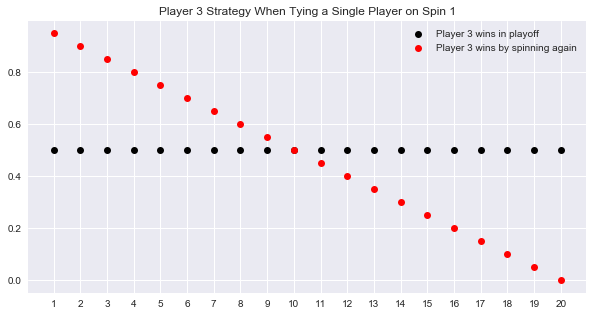

In [25]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [0.5] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying a Single Player on Spin 1')
plt.legend();

### Two Leaders

If Players 1 and 2 are tied, then Player 3's optimal strategy is a bit different. Now the chances of winning a one-spin playoff are only $\frac{1}{3}$, but the chances of staying under \\$1.00 are still $\frac{20-z}{20}$, where again:

- $z$ is the value of Player 3's first spin (and the leaders' score)

*These* two probabilities are equal when $z=\frac{40}{3}$, and so we have the second result that, if Players 1 and 2 are already tied when Player 3 ties them in one spin, Player 3 should spin again on a score of 65 or less; and stay on a score of 70 or more.

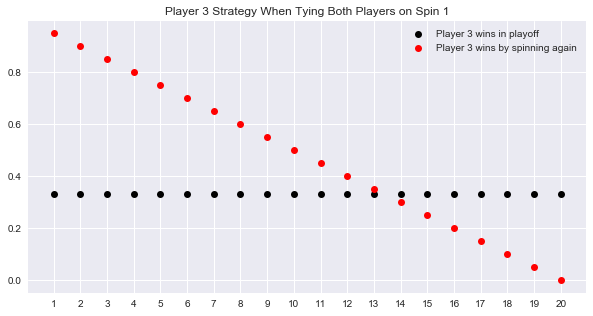

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(1, 21)

playoff_win = [1/3] * 20
spin_again_win = [(20 - x) / 20 for x in xs]

ax.plot(xs, playoff_win, 'ko', label='Player 3 wins in playoff')
ax.plot(xs, spin_again_win, 'ro', label='Player 3 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 3 Strategy When Tying Both Players on Spin 1')
plt.legend();

This discussion of Player 3's optimal strategy does not consider the benefits of going for \\$1.00 and the bonus prize, and that will be our general assumption moving forward. When analyzing Player 2's optimal strategy, we'll assume that Player 3 will follow the optimal strategy we've just worked out here.

## Player 2's Optimal Strategy

Now we turn to Player 2. Let's first calculate the probability of winning for Player 2 by spinning twice:

First of all, Player 2 has to spin so as not to produce a total greater than \\$1.00, so that's:

$P(not-go-over | spin) = \frac{20-S1}{20}$, where:

- S1 is the value of Player 2's first spin

The next thing that needs to happen is that Player 3 doesn't get a higher score. This could happen either because Player 3 gets less than Player 2's score on two spins or because Player 3 exceeds \\$1.00. There is also a third chance for Player 2 to win, which is that Player 3 ties Player 2 but then loses to Player 2 in a one-spin playoff.

### Player 3 Fails to Surpass Player 2 on Two Spins

Let's work out the chance of the first possibility:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [113]:
prob_plyr3_too_small(20)

0.4275

In [115]:
# 18/20 for first spinning $0.05
# 17/20 for first spinning $0.10
# etc.

171/400

0.4275

In [114]:
prob_plyr3_too_small(3)

0.0025

In [116]:
1/400

0.0025

In [125]:
[prob_plyr3_too_small(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275]

### Player 3 Exceeds \\$1.00

Let's now think about the second way in which Player 2 can win: Player 3 going over \\$1.00. We assume here that Player 3's first spin is strictly less than Player 2's score.

$P(P3-exceeds-100 | two-spins) = \frac{1}{20}\Sigma^{P2-1}_{z=1}\frac{z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

In [122]:
prob_plyr3_goes_over(20)

0.475

In [128]:
# 1/20 for first spinning $0.05
# 2/20 for first spinning $0.10
# etc.

190/400

0.475

In [123]:
prob_plyr3_goes_over(1)

0.0

In [124]:
prob_plyr3_goes_over(2)

0.0025

In [129]:
1/400

0.0025

In [130]:
[prob_plyr3_goes_over(plyr2) for plyr2 in np.arange(1, 21)]

[0.0,
 0.0025,
 0.0075,
 0.015,
 0.025,
 0.0375,
 0.0525,
 0.07,
 0.09,
 0.1125,
 0.1375,
 0.165,
 0.195,
 0.2275,
 0.2625,
 0.3,
 0.34,
 0.3825,
 0.4275,
 0.475]

### Player 3 Ties Player 2

The last possibility for Player 2 to win occurs when Player 3 ties Player 2 on one or two spins.

We'll assume that Player 3 follows the optimal strategy worked out above, and so that means that if Player 2's score is \\$0.50 or less, Player 3 will spin again, and otherwise Player 3 will opt for the one-spin playoff.

Where $z$ is the value of Player 3's first spin (and Player 2's score), the probability of Player 2 winning in this way is thus:

- $\left(\frac{1}{20}\right)\left(\frac{z}{20}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ if $z <= 10$
- $\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{z-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)$ otherwise

In [194]:
prob_plyr3_ties_then_loses(20)

0.04875

In [134]:
1/40 + 19/800

0.04875

### Putting it All Together

We've now canvassed all the options for Player 2 to win, assuming that Player 1 is not in the picture. We started by assuming that Player 2 would spin again. But notice that our calculations will be much the same if Player 2 decides instead to stay. (But the expectation value of Player 2's score will of course be lower.)

The part that needs working out is getting from Player 2's first spin S1 to Player 2's score P2, i.e. we need to take into account the effect of Player 2's second spin.

Let's start with the idea of Player 3 failing to surpass Player 2 on two spins. Suppose Player 2 first spins \\$0.50. We said above that the probability of Player 2 winning by Player 3 failing to surpass Player 2 on two spins is:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$.

If Player 2 first spins \\$0.50, then there's a 5\% chance that P2 will be \\$0.55, a 5\% chance that P2 will be \\$0.60, etc. And of course there is also a 50\% chance that Player 2 will go over \\$1.00.

In general, in terms of Player 2's two spins S1 and S2, we have:

$P(P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-2}_{z=1}\frac{S1+S2-1-z}{20}$, where:

- z is the value of Player 3's first spin

In [136]:
[plyr3_too_small_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.1425,
 0.1425,
 0.142375,
 0.142,
 0.14125,
 0.14,
 0.138125,
 0.1355,
 0.132,
 0.1275,
 0.121875,
 0.115,
 0.10675,
 0.097,
 0.085625,
 0.0725,
 0.0575,
 0.0405,
 0.021375,
 0.0]

Now let's think about the idea of Player 3 going over \\$1.00.

Similar reasoning to the above leads us to the equation:

$P(P3-too-small | first-spin) = \frac{1}{20}\Sigma^{20-S1}_{S2=1}\frac{1}{20}\Sigma^{S1+S2-1}_{z=1}\frac{z}{20}$.

In [138]:
[plyr3_goes_over_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.16625,
 0.166125,
 0.16575,
 0.165,
 0.16375,
 0.161875,
 0.15925,
 0.15575,
 0.15125,
 0.145625,
 0.13875,
 0.1305,
 0.12075,
 0.109375,
 0.09625,
 0.08125,
 0.06425,
 0.045125,
 0.02375,
 0.0]

There is the final case of Player 3 tying Player 2 and then losing:

$P(P3-ties-then-loses | first-spin) = \frac{1}{20}\Sigma^{10-S1}_{S2=1}\left[\left(\frac{1}{20}\right)\left(\frac{S1+S2}{20}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]+\frac{1}{20}\Sigma^{20-S1}_{S2=11-S1, S2>0}\left[\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)+\left(\frac{S1+S2-1}{20}\right)\left(\frac{1}{20}\right)\left(\frac{1}{2}\right)\right]$.

In order to deal with the starting index for the second sum, we'll take the max of {11-S1, 1}.

In [140]:
[plyr3_ties_then_loses_given_first_spin_plyr2(spin1) for spin1 in np.arange(1, 21)]

[0.031125,
 0.0308125,
 0.0303125,
 0.029625,
 0.02875,
 0.027687499999999997,
 0.0264375,
 0.025,
 0.023375,
 0.0215625,
 0.0196875,
 0.01775,
 0.01575,
 0.013687499999999998,
 0.0115625,
 0.009375000000000001,
 0.007125,
 0.0048125,
 0.0024375,
 0.0]

In [179]:
plyr2_defeats_plyr3(20, spin_again=False)

0.9512499999999999

In [180]:
plyr2_defeats_plyr3(20, spin_again=True)

0.0

In [181]:
plyr2_defeats_plyr3(10, spin_again=False)

0.23875000000000002

In [182]:
plyr2_defeats_plyr3(10, spin_again=True)

0.2946875

In [7]:
stay = [plyr2_defeats_plyr3(x, spin_again=False) for x in np.arange(1, 21)]

In [8]:
spin_again = [plyr2_defeats_plyr3(x, spin_again=True) for x in np.arange(1, 21)]

In [9]:
probs = list(zip(stay, spin_again))
probs

[(0.0025, 0.339875),
 (0.00875, 0.3394375),
 (0.02, 0.3384375),
 (0.03625, 0.336625),
 (0.0575, 0.33375),
 (0.08374999999999999, 0.3295625),
 (0.11499999999999999, 0.3238125),
 (0.15125, 0.31625000000000003),
 (0.1925, 0.306625),
 (0.23875000000000002, 0.2946875),
 (0.2875, 0.2803125),
 (0.34125, 0.26325),
 (0.39999999999999997, 0.24324999999999997),
 (0.46375, 0.2200625),
 (0.5325, 0.1934375),
 (0.60625, 0.163125),
 (0.685, 0.128875),
 (0.76875, 0.0904375),
 (0.8575, 0.0475625),
 (0.9512499999999999, 0.0)]

In [10]:
player2probsdf = pd.DataFrame(probs,
             columns=['prob_win_if_stay', 'prob_win_if_spin_again'],
            index=np.arange(5, 101, 5))
player2probsdf

,prob_win_if_stay,prob_win_if_spin_again
5,0.00250,0.339875
10,0.00875,0.339438
15,0.02000,0.338438
20,0.03625,0.336625
25,0.05750,0.333750
30,0.08375,0.329562
35,0.11500,0.323813
40,0.15125,0.316250
45,0.19250,0.306625
50,0.23875,0.294687


We can see from this list of probabilities of winning for Player 2 for each strategy that:

- Player 2 should spin again if the first spin is less than 55 cents
- Player 2 should stay if the first spin is greater than or equal to 55 cents
- 55 cents is the worst first spin in the sense that the function `max(P(win| stay), P(win | spin again))` is at its minimum.

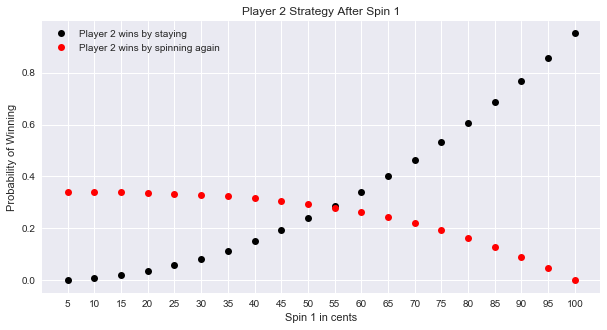

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = np.arange(5, 101, 5)

stay_win = player2probsdf['prob_win_if_stay']
spin_again_win = player2probsdf['prob_win_if_spin_again']

ax.plot(xs, stay_win, 'ko', label='Player 2 wins by staying')
ax.plot(xs, spin_again_win, 'ro', label='Player 2 wins by spinning again')
ax.set_xticks(xs)
ax.set_title('Player 2 Strategy After Spin 1')
ax.set_xlabel('Spin 1 in cents')
ax.set_ylabel('Probability of Winning')
plt.legend();

## Player 1's Optimal Strategy

We'll prove here that Player 1 should spin again with \\$0.65 but stand on \\$0.70.

As before, we'll simply consider all the possible ways for Player 1 to win.

First, if Player 1 spins a second time, the total will need to be less than or equal to \\$1.00. So once again that's:

$P(not-go-over | spin) = \frac{20-S1}{20}$, where:

- S1 is the value of Player 1's first spin

The rest of the calculation is similar to our calculation for Player 2, except now Player 1 must defeat both Player 2 and Player 3. So Player 1 wins if:

- Players 2 and 3 both have a total under Player 1's total, or
- Player 2's total is under Player 1's and Player 3 exceeds \\$1.00, or
- Player 3's total is under Player 1's and Player 2 exceeds \\$1.00, or
- Players 2 and 3 both exceed \\$1.00.

And there are a number of scenarios involving ties in which Player 1 can win as well. As before we'll save these tying scenarios for the end.

Also as before, we'll start by considering Player 1's total score before expressing ourselves in terms of Player 1's individual spins.

### Players 2 and 3 Fail to Surpass Player 1 on Two Spins

Above we worked out the probability for Player 3 to fail to surpass Player 2 on two spins. That number was:

$P(P3-too-small | two-spins) = \frac{1}{20}\Sigma^{P2-2}_{z=1}\frac{P2-1-z}{20}$, where:

- P2 is Player 2's score
- z is the value of Player 3's first spin

So if both Player 2 and Player 3 will fail to surpass Player 1, we'll have:

$P(P2-too-small \& P3-too-small | two-spins) = \left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-2}_{P3S1=1}\frac{P1-1-P3S1}{20}\right)$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin
- P3S1 is the value of Player 3's first spin

Note in particular that these two events (each of Players 2 and 3 failing to surpass Player 1) are probablistically independent; hence we simply have to multiply them together.

In [15]:
prob_plyr2_and_plyr3_too_small(3)

6.25e-06

In [16]:
1/20**4

6.25e-06

In [14]:
[prob_plyr2_and_plyr3_too_small(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 6.25e-06,
 5.625e-05,
 0.000225,
 0.0006250000000000001,
 0.00140625,
 0.0027562499999999996,
 0.004900000000000001,
 0.0081,
 0.01265625,
 0.018906250000000003,
 0.027225000000000003,
 0.038025,
 0.051756250000000004,
 0.06890625,
 0.09,
 0.11560000000000002,
 0.14630625,
 0.18275624999999998]

### Player 2 Fails to Surpass Player 1 on Two Spins and Player 3 Exceeds \\$1.00

These two events are also probablistically independent. Moreover, with Player 2 out of the picture, the possibilities for Player 3 exceeding \\$1.00 trying to defeat Player 1 are completely analogous to the possibilities we considered above for Player 3 exceeding \\$1.00 trying to defeat Player 2 with Player 1 out of the picture.

Since:

$P(P2-too-small | two-spins) = \frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}$, where:

- P1 is Player 1's score
- P2S1 is the value of Player 2's first spin

and:

$P(P3-exceeds-100 | two-spins) = \frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}$, where:

- P1 is Player 1's score
- P3S1 is the value of Player 3's first spin

we have:

$P(P2-too-small\&P3-exceeds-100 | two-spins) = \left(\frac{1}{20}\Sigma^{P1-2}_{P2S1=1}\frac{P1-1-P2S1}{20}\right)\left(\frac{1}{20}\Sigma^{P1-1}_{P3S1=1}\frac{P3S1}{20}\right)$

In [17]:
def plyr2_too_small_and_plyr3_goes_over(plyr1):
    """This function returns the probability that both Player 2's
    total will be under Player 1's and Player 3's will be over
    $1.00 (after failing to match or exceed Player 1's total on
    the first spin)."""
    
    import numpy as np
    prob = 1
    plyr2spin1s = np.arange(1, plyr1-1)
    addends = [(plyr1-1-plyr2spin1) for plyr2spin1 in plyr2spin1s]
    prob *= np.sum(addends) / 400
    plyr3spin1s = np.arange(1, plyr1)
    prob *= np.sum(plyr3spin1s) / 400
    return prob

In [19]:
plyr2_too_small_and_plyr3_goes_over(20)

0.20306249999999998

In [20]:
171/400 * 190/400

0.20306249999999998

In [21]:
[plyr2_too_small_and_plyr3_goes_over(plyr1) for plyr1 in np.arange(1, 21)]

[0.0,
 0.0,
 1.875e-05,
 0.0001125,
 0.000375,
 0.0009375,
 0.00196875,
 0.0036750000000000003,
 0.0063,
 0.010125,
 0.015468750000000002,
 0.022687500000000003,
 0.032175,
 0.044362500000000006,
 0.05971875000000001,
 0.07875,
 0.10200000000000001,
 0.13005,
 0.16351875,
 0.20306249999999998]

### Player 2 Exceeds \\$1.00 and Player 3 Fails to Surpass Player 1

There is a new complication here, which is that Player 2 may exceed \\$1.00 *even when Player 2 has enough to defeat Player 1 on the first spin*. If Player 1 only manages to get, say, \\$0.20 on two spins, and then Player 2 gets \\$0.30 on the first spin, Player 2 should spin again, even though Player 2 risks exceeding \\$1.00 -- and, if that happens, Player 1 could still win!